In [12]:
from import_functions_generic import * 
from import_functions_plotting import * 

import vip_hci as vip
from vip_hci.fm import scattered_light_disk

In [13]:
#plt.style.use('classic')  

rcParams.update({#'font.size': 14,  'axes.labelsize' : 14, 'legend.fontsize' : 12,
#"font.family": "serif", 'text.usetex' : True, "font.serif": [], "font.sans-serif": [],
'legend.handlelength': 1, 'legend.borderaxespad' : 0.8, 'legend.columnspacing' : 1, 'legend.handletextpad' : 0.5})

rcParams['mathtext.fontset'] = 'stix'

In [14]:
L = time.localtime()
date = "{}-{}-{}".format(L[0],L[1],L[2],L[3],L[4],L[5])

saving_dir = 'figs/fig_v{}/'.format(date)
os.makedirs(saving_dir,exist_ok=True)

In [25]:
fontsize_text = 14

# I. Functions 

In [15]:
def SPF(phi, g=0.5, mode='HG_1g', polar=False):
    if mode == 'HG_1g':
        #print(mode)
        SPF = HG_1g(phi, g)
    elif mode == '1':
        SPF = 1
    else: raise ValueError('The input mode ({}) is not available.'.format(mode))
    if polar: 
        SPF *= (1-(np.cos(phi))**2) / (1+(np.cos(phi))**2)
    return SPF
    
def HG_1g(phi, g=0.5):
    fact = 1/(4*np.pi) 
    return fact * (1-g**2) / (1-2*g*np.cos(phi)+g**2)**(3/2)

# II. Plot Scattering Phase Function - Examples

## Henyey Greenstein

### - Total intensity

In [16]:
PHI = np.linspace(0,np.pi,100)
g = 0.9
mode = 'HG_1g'
polar = False

namesave = 'SPF_TI_1g.pdf'

SPF_TI = np.array([ SPF(phi, g, mode=mode, polar=polar) for phi in PHI])

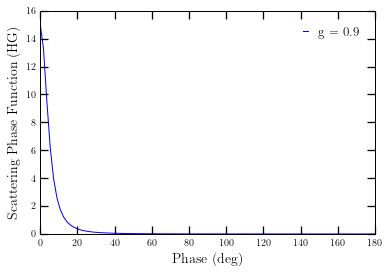

In [18]:
fig, ax = plt.subplots(1,1)
ax.plot(PHI*180/np.pi, SPF_TI, label='g = {}'.format(g))
ax.set_ylabel('Scattering Phase Function (HG)')
ax.set_xlabel('Phase (deg)')
ax.legend(loc='upper right', frameon=False)
plt.show()

##### Consider several g

In [19]:
PHI = np.linspace(0,np.pi,180)
G = [0.3,0.5,0.7 ,0.9, -0.7]
mode = 'HG_1g'
polar = False
colors = ['mediumseagreen', 'teal', 'royalblue', 'palevioletred',  'gold']

namesave = 'SPF_TI_several_g.pdf'


Normalized at angle 1 deg


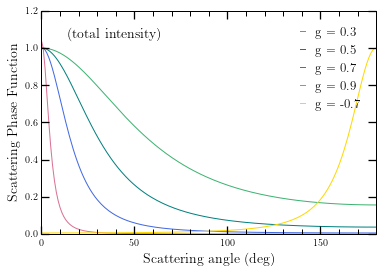

In [24]:
# Figure
fig, ax = plt.subplots(1,1)#, figsize=figsize)
for i in range(len(G)):
    g = G[i]
    SPF_ti = np.array([ SPF(phi, g, mode=mode, polar=polar) for phi in PHI])
    
    # Normalization
    if i != len(G)-1: X1_idx_normf = 1
    else: X1_idx_normf = 180-1
    if i==0: print('Normalized at angle {:.0f} deg'.format(PHI[X1_idx_normf]*180/np.pi))
    SPF_ti = SPF_ti/SPF_ti[X1_idx_normf]
  
    ax.plot(PHI*180/np.pi, SPF_ti, label='g = {}'.format(g), color=colors[i])
    
ax.text(0.08, 0.88, '(total intensity)', transform=ax.transAxes, fontsize=fontsize_text) #Rayleigh polarised fraction
ax.set_ylabel('Scattering Phase Function')
ax.set_xlabel('Scattering angle (deg)')
ax.legend(loc='upper right', frameon=False)
ax.set_xlim([0,180])
#ax.set_yscale('log')
mise_en_page(ax, x_step=1, x_maj_step=50, x_min_step=10)
plt.savefig(saving_dir+namesave, dpi=300)
plt.show()

### - Polar (Rayleigh polarised fraction)

In [26]:
PHI = np.linspace(0,np.pi,100)
g = 0.9
mode = 'HG_1g'
polar = True

namesave = 'SPF_polar_1g.pdf'

SPF_polar = np.array([ SPF(phi, g, mode=mode, polar=polar) for phi in PHI])

##### Fixed 1 g

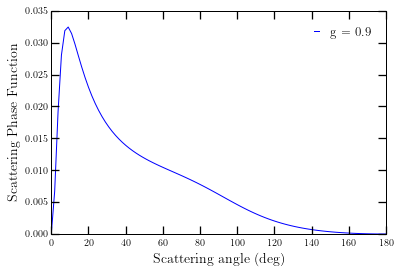

In [27]:
fig, ax = plt.subplots(1,1)
ax.plot(PHI*180/np.pi, SPF_polar, label='g = {}'.format(g))
ax.set_ylabel('Scattering Phase Function')
ax.set_xlabel('Scattering angle (deg)')
ax.legend(loc='upper right', frameon=False)

plt.savefig(saving_dir+namesave, dpi=300)
plt.show()

##### Consider several g

In [28]:
PHI = np.linspace(0,np.pi,180)
G = [0,0.3,0.5,0.7,0.9, -0.3]
mode = 'HG_1g'
polar = True
# Initialization
colors = ['mediumseagreen', 'teal', 'royalblue', 'palevioletred',  'crimson', 'gold']

figsize = (5.2,3)
namesave = 'SPF_polar_several_g.pdf'

Normalized at angle 10 deg


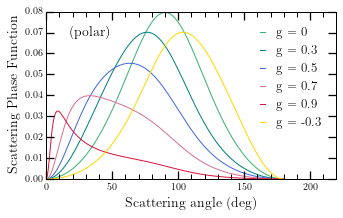

In [32]:
fig, ax = plt.subplots(1,1, figsize=figsize)
for i in range(len(G)):
    g = G[i]
    SPF_polar = np.array([ SPF(phi, g, mode=mode, polar=polar) for phi in PHI])
    
    # Normalization
    if i != len(G)-1: X1_idx_normf = 10
    else: X1_idx_normf = 90
    if i==0: print('Normalized at angle {:.0f} deg'.format(PHI[X1_idx_normf]*180/np.pi))
    #SPF_polar = SPF_polar/SPF_polar[X1_idx_normf]
  
    ax.plot(PHI*180/np.pi, SPF_polar, label='g = {}'.format(g), color=colors[i])
    
ax.text(0.08, 0.85, '(polar)', transform=ax.transAxes, fontsize=fontsize_text) #Rayleigh polarised fraction
ax.set_ylabel('Scattering Phase Function')
ax.set_xlabel('Scattering angle (deg)')
ax.legend(loc='upper right', frameon=False)
ax.set_xlim([0,220])
mise_en_page(ax, x_step=1, x_maj_step=50, x_min_step=10)
plt.savefig(saving_dir+namesave, dpi=300)
plt.show()

### - Only Rayleigh scattering

In [33]:
PHI = np.linspace(0,np.pi,100)
mode = '1' # only Rayleigh scattering
polar = True

figsize = (4,3)
namesave = 'SPF_only_Rayleigh.pdf'

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


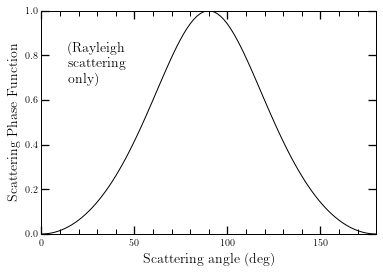

In [35]:
fig, ax = plt.subplots(1,1)#, figsize=figsize)

SPF_R = np.array([ SPF(phi, g, mode=mode, polar=polar) for phi in PHI])
ax.plot(PHI*180/np.pi, SPF_R, color='black') #, label='g = {}'.format(g))
    
ax.text(0.08, 0.68, '(Rayleigh \nscattering\nonly)', transform=ax.transAxes, fontsize=fontsize_text) #Rayleigh polarised fraction
ax.set_ylabel('Scattering Phase Function')
ax.set_xlabel('Scattering angle (deg)')
ax.legend(loc='upper right', frameon=False)
ax.set_xlim([0,180])

mise_en_page(ax, x_step=1, x_maj_step=50, x_min_step=10)
plt.savefig(saving_dir+namesave, dpi=300)
plt.show()

# III. Plot Scattering Phase Function - Solutions

## Henyey Greenstein

### - Total intensity

In [36]:
# Consider several g
PHI = np.linspace(0,np.pi,100)
G = [0.70, 0.75, 0.80, 0.85 , 0.90, 0.95]
mode = 'HG_1g'
polar = False
colors = ['mediumseagreen', 'teal', 'royalblue', 'palevioletred',  'crimson',  'gold']

namesave = 'SPF_TI_several_g.pdf'

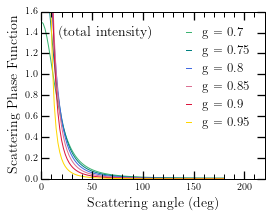

In [37]:
fig, ax = plt.subplots(1,1, figsize=figsize)
for i in range(len(G)):
    g = G[i]
    SPF_polar = np.array([ SPF(phi, g, mode=mode, polar=polar) for phi in PHI])
    ax.plot(PHI*180/np.pi, SPF_polar, label='g = {}'.format(g), color=colors[i])
    
ax.text(0.08, 0.85, '(total intensity)', transform=ax.transAxes, fontsize=fontsize_text) #Rayleigh polarised fraction
ax.set_ylabel('Scattering Phase Function')
ax.set_xlabel('Scattering angle (deg)')
ax.legend(loc='upper right', frameon=False)
ax.set_xlim([0,220])
ax.set_ylim([0,1.6])
#ax.set_yscale('log')
mise_en_page(ax, x_step=1, x_maj_step=50, x_min_step=10)
plt.savefig(saving_dir+namesave, dpi=300)
plt.show()

### - Polar (Rayleigh polarised fraction)

In [38]:
# Consider several g
PHI = np.linspace(0,np.pi,100)
G = [0.7, 0.75, 0.80, 0.85 , 0.90, 0.95]
mode = 'HG_1g'
polar = True
# Initialization
colors = ['mediumseagreen', 'teal', 'royalblue', 'palevioletred',  'crimson', 'gold']

figsize = (5.2,3)
namesave = 'SPF_polar_several_g.pdf'

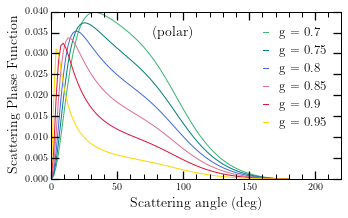

In [39]:
fig, ax = plt.subplots(1,1, figsize=figsize)
for i in range(len(G)):
    g = G[i]
    SPF_polar = np.array([ SPF(phi, g, mode=mode, polar=polar) for phi in PHI])
    ax.plot(PHI*180/np.pi, SPF_polar, label='g = {}'.format(g), color=colors[i])
    
ax.text(0.35, 0.85, '(polar)', transform=ax.transAxes, fontsize=fontsize_text) #Rayleigh polarised fraction
ax.set_ylabel('Scattering Phase Function')
ax.set_xlabel('Scattering angle (deg)')
ax.legend(loc='upper right', frameon=False)
ax.set_xlim([0,220])
mise_en_page(ax, x_step=1, x_maj_step=50, x_min_step=10)
plt.savefig(saving_dir+namesave, dpi=300)
plt.show()

### - Compare total intensity vs polar

In [40]:
# Consider several g
PHI = np.linspace(0,np.pi,100)
G = [0.7, 0.75, 0.80, 0.85 , 0.90, 0.95]
mode = 'HG_1g'
# polar = True

# Initialization
colors = ['mediumseagreen', 'teal', 'royalblue', 'palevioletred',  'crimson', 'gold']

figsize = (5.2,3)
namesave = 'SPF_ratio_several_g.pdf'

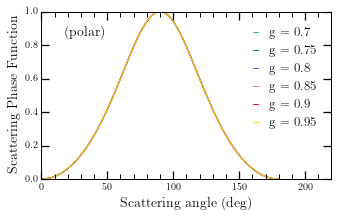

In [41]:
fig, ax = plt.subplots(1,1, figsize=figsize)
for i in range(len(G)):
    g = G[i]
    SPF_polar = np.array([ SPF(phi, g, mode=mode, polar=True) for phi in PHI])
    SPF_ti = np.array([ SPF(phi, g, mode=mode, polar=False) for phi in PHI])
    ax.plot(PHI*180/np.pi, 1*SPF_polar/SPF_ti, label='g = {}'.format(g), color=colors[i])
    
ax.text(0.08, 0.85, '(polar)', transform=ax.transAxes, fontsize=fontsize_text) #Rayleigh polarised fraction
ax.set_ylabel('Scattering Phase Function')
ax.set_xlabel('Scattering angle (deg)')
ax.legend(loc='upper right', frameon=False)
ax.set_xlim([0,220])
mise_en_page(ax, x_step=1, x_maj_step=50, x_min_step=10)
plt.savefig(saving_dir+namesave, dpi=300)
plt.show()

ah..

# III. Data

In [42]:
# SPF in polarimetry from Olofson et al. 2022b
dF_SPF_polar = pd.read_csv('inputs/SPF_polar.txt')
dF_SPF_polar.head()

SPF_polar_extraction = dF_SPF_polar['spf']
SPF_polar_extraction_e = dF_SPF_polar['spf_e']
SPF_polar_extraction_theta = dF_SPF_polar['theta']

In [43]:
# Parameters - SPF
PHI = np.linspace(0,np.pi,100)
g_ti = 0.84
g_polar = 0.7
mode = 'HG_1g'

# Parameters - Fig
color_to_hide = [0.6]*3
phi_min = 12
colors = ['mediumseagreen', 'teal', 'royalblue', 'palevioletred',  'gold']

## a. Polarimetry: model vs direct extraction

**Note:** the best polarimetric model is reached for g = 0.76 but actually g = 0.7 fits better with the direct extraction from Olofsson et al. 2022b.

wanted element: 54.54545454545455 
closest element in the list L: 55.102040816326536


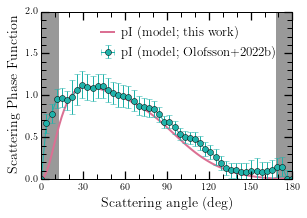

In [44]:
namesave = 'SPF_polar_g=0.7.pdf'

SPF_ti = np.array([ SPF(phi, g_ti, mode=mode, polar=False) for phi in PHI])
SPF_polar = np.array([ SPF(phi, g_polar, mode=mode, polar=True) for phi in PHI])

X1, Y1 = PHI*180/np.pi, SPF_polar
X2, Y2, Y2_err = SPF_polar_extraction_theta*180/np.pi, SPF_polar_extraction, SPF_polar_extraction_e
X3, Y3 = PHI*180/np.pi, SPF_ti

# Normalization
X1_idx_normf = 30
X2_idx_normf = index_closer(X1[X1_idx_normf], X2, display=1)
Y1_normf = Y1[X1_idx_normf]
Y2_normf = Y2[X2_idx_normf]
Y3_normf = Y3[X1_idx_normf]

Y1, Y2, Y2_err = Y1/Y1_normf, Y2/Y2_normf, Y2_err/Y2_normf 
Y3 = Y3/Y3_normf

color_olofsson = 'lightseagreen'
# Figure
fig, ax = plt.subplots(1,1, figsize=(4.5,3))

#ax.plot(X3, Y3, label='tot. int. \n(model, g = {})'.format(g_ti), color=colors[3])
ax.plot(X1, Y1, label='pI (model; this work)'.format(g_polar), color=colors[3], lw=2)
ax.errorbar(X2, Y2, Y2_err, 0, label='pI (model; Olofsson+2022b)', marker='o', color=color_olofsson)

ax.set_ylabel('Scattering Phase Function')
ax.set_xlabel('Scattering angle (deg)')
ax.legend(loc='upper right', frameon=False, numpoints=1)

# lims
xlim, ylim = ax.get_xlim(), ax.get_ylim()
ylim = [0, 2] 
#ylim = [0, ylim[1]]
ax.fill_between([0, phi_min], 2*[ylim[1]], ls='-',color=color_to_hide,label='IWA')
ax.fill_between([180-phi_min, 180], 2*[ylim[1]], ls='-',color=color_to_hide,label='IWA')

ax.set_ylim(ylim)

mise_en_page(ax,x_step=1,x_maj_step=30,x_min_step=10, y_step=1,y_maj_step=0.5,y_min_step=0.1)
plt.savefig(saving_dir+namesave, dpi=300)
plt.show()

## b. Polarised fraction

In [321]:
# Parameters - SPF
PHI = np.linspace(0,np.pi,100)
g_ti = 0.84
g_polar = 0.76
mode = 'HG_1g'

# Parameters - Fig
color_to_hide = [0.6]*3
phi_min = 12
colors = ['mediumseagreen', 'teal', 'royalblue', 'palevioletred',  'gold']

wanted element: 73.46938775510203 
closest element in the list L: 73.46938775510203


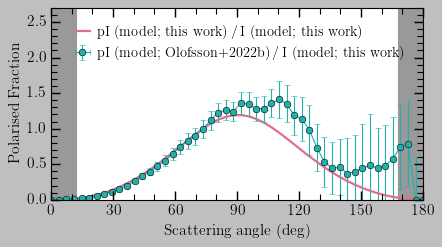

In [322]:
namesave = 'Polarised_fraction.pdf'

PHI = SPF_polar_extraction_theta
SPF_ti = np.array([ SPF(phi, g_ti, mode=mode, polar=False) for phi in PHI])
SPF_polar = np.array([ SPF(phi, g_polar, mode=mode, polar=True) for phi in PHI])

X1, Y1 = PHI*180/np.pi, SPF_polar
X2, Y2, Y2_err = SPF_polar_extraction_theta*180/np.pi, SPF_polar_extraction, SPF_polar_extraction_e
X3, Y3 = PHI*180/np.pi, SPF_ti

# Normalization
X1_idx_normf = 20
X2_idx_normf = index_closer(X1[X1_idx_normf], X2, display=1)
Y1_normf = Y1[X1_idx_normf]
Y2_normf = Y2[X2_idx_normf]
Y3_normf = Y3[X1_idx_normf]

Y1, Y2, Y2_err = Y1/Y1_normf, Y2/Y2_normf, Y2_err/Y2_normf 
Y3 = Y3/Y3_normf

# Y13
Y13 = Y1/Y3
# Y23 #Y3_interp = griddata(X2, Y2, X1)
Y23 = Y2/Y3
Y23_err = Y2_err/Y3

color_olofsson = 'lightseagreen'
# Figure
fig, ax = plt.subplots(1,1, figsize=(6,3))

#ax.plot(X3, Y3, label='tot. int. \n(model, g = {})'.format(g_ti), color=colors[3])
ax.plot(X1, Y13, label='pI (model; this work)\,/\,I (model; this work)'.format(g_polar), color=colors[3], lw=2)
ax.errorbar(X2, Y23, Y23_err, 0, label=' pI (model; Olofsson+2022b)\,/\,I (model; this work)', marker='o', color=color_olofsson)

ax.set_ylabel('Polarised Fraction')
ax.set_xlabel('Scattering angle (deg)')
ax.legend(loc='upper right', frameon=False, numpoints=1)

# lims
xlim, ylim = ax.get_xlim(), ax.get_ylim()
ylim = [0, 2.7] 
ylim = [0, ylim[1]]
ax.fill_between([0, phi_min], 2*[ylim[1]], ls='-',color=color_to_hide,label='IWA')
ax.fill_between([180-phi_min, 180], 2*[ylim[1]], ls='-',color=color_to_hide,label='IWA')

ax.set_ylim(ylim)
mise_en_page(ax,x_step=1,x_maj_step=30,x_min_step=10, y_step=1,y_maj_step=0.5,y_min_step=0.1)

plt.savefig(saving_dir+namesave, dpi=300)
plt.show()

In [323]:
figsize

(5.2, 3)

In [100]:
colors

['mediumseagreen', 'teal', 'royalblue', 'palevioletred', 'crimson', 'gold']